<a href="https://colab.research.google.com/github/meghacuj/ds_internship_2023_Innomatics/blob/main/Innomatics_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_movies=pd.read_csv("movies.csv")
df_movies.shape

(9742, 3)

In [5]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df_ratings=pd.read_csv("ratings.csv")
df_ratings.shape

(100836, 4)

In [7]:
## How many uniques "userId" is avaialable in ratings dataset?
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
df_ratings.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [9]:
## Which movie has recieved maximum number of user ratings?

#df_1= pd.concat([df_ratings,df_movies])
#df_1.head()

df_1_mer = pd.merge(df_ratings, df_movies, on="movieId")
df_1_mer.head()


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [10]:
ratings_count = df_1_mer.groupby('title')['rating'].count().reset_index(name='ratings_count')
ratings_count.head()

,title,ratings_count
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [11]:
max_ratings_movie = ratings_count[ratings_count['ratings_count'] == ratings_count['ratings_count'].max()]

In [12]:
max_ratings_movie

,title,ratings_count
3158,Forrest Gump (1994),329


In [13]:
## Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [14]:
df_tags=pd.read_csv("tags.csv")
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [15]:
# merge movies dataset with tags dataset.
df_2_merg = pd.merge(df_movies,df_tags,on="movieId")
df_2_merg.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932


In [16]:
# Find the movieId for "The Matrix (1999)""
matrix_movie_id = df_2_merg[df_2_merg['title'] == 'Matrix, The (1999)']
matrix_movie_id

,movieId,title,genres,userId,tag,timestamp
1313,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,martial arts,1457842912
1314,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,sci-fi,1457842899
1315,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,474,alternate universe,1137204991
1316,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,philosophy,1424141098
1317,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,post apocalyptic,1424141101


In [17]:
matrix_movie_id = df_2_merg[df_2_merg['title'] == 'Matrix, The (1999)']['movieId'].values[0]
matrix_movie_id

2571

In [18]:
matrix_tags = df_2_merg[df_2_merg['movieId'] == matrix_movie_id]['tag']
print(matrix_tags)


1313          martial arts
1314                sci-fi
1315    alternate universe
1316            philosophy
1317      post apocalyptic
Name: tag, dtype: object


In [19]:
## What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [20]:
df_1_mer = pd.merge(df_ratings, df_movies, on="movieId")
df_1_mer.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [21]:
# Find the movieId for "Terminator 2: Judgment Day (1991)"
terminator2_movie_id = df_1_mer[df_1_mer['title'] == 'Terminator 2: Judgment Day (1991)']
terminator2_movie_id.head()


,userId,movieId,rating,timestamp,title,genres
26714,5,589,3.0,847435258,Terminator 2: Judgment Day (1991),Action|Sci-Fi
26715,6,589,3.0,845553317,Terminator 2: Judgment Day (1991),Action|Sci-Fi
26716,7,589,2.5,1106635940,Terminator 2: Judgment Day (1991),Action|Sci-Fi
26717,11,589,4.0,902154266,Terminator 2: Judgment Day (1991),Action|Sci-Fi
26718,15,589,5.0,1510572012,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [22]:
terminator2_movie_id = df_1_mer[df_1_mer['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
terminator2_movie_id

589

In [25]:
# Filter ratings for the terminator2_movie movieId
terminator2_ratings = df_1_mer[df_1_mer['movieId'] == terminator2_movie_id]
terminator2_ratings.head()


,userId,movieId,rating,timestamp,title,genres
26714,5,589,3.0,847435258,Terminator 2: Judgment Day (1991),Action|Sci-Fi
26715,6,589,3.0,845553317,Terminator 2: Judgment Day (1991),Action|Sci-Fi
26716,7,589,2.5,1106635940,Terminator 2: Judgment Day (1991),Action|Sci-Fi
26717,11,589,4.0,902154266,Terminator 2: Judgment Day (1991),Action|Sci-Fi
26718,15,589,5.0,1510572012,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [24]:
avg_rating=terminator2_ratings["rating"].mean()
avg_rating

3.970982142857143

In [ ]:
## How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [32]:
            #movieId for "Fight Club (1999)"

fight_club_movie_id = df_1_mer[df_1_mer['title'] == 'Fight Club (1999)']['movieId'].values[0]
fight_club_movie_id

2959

In [33]:
              #ratings for the specified movieId
fight_club_ratings = df_1_mer[df_1_mer['movieId'] == fight_club_movie_id]['rating']
fight_club_ratings

14323    5.0
14324    2.0
14325    0.5
14326    2.5
14327    3.5
        ... 
14536    5.0
14537    4.0
14538    5.0
14539    5.0
14540    5.0
Name: rating, Length: 218, dtype: float64

(array([  3.,   6.,  13.,  66., 130.]),
 array([0.5, 1.4, 2.3, 3.2, 4.1, 5. ]),
 <BarContainer object of 5 artists>)

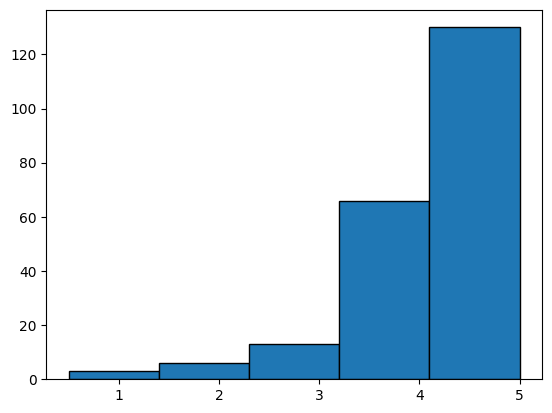

In [35]:
import matplotlib.pyplot as plt


plt.hist(fight_club_ratings, bins=5, edgecolor='black')


<Axes: ylabel='Density'>

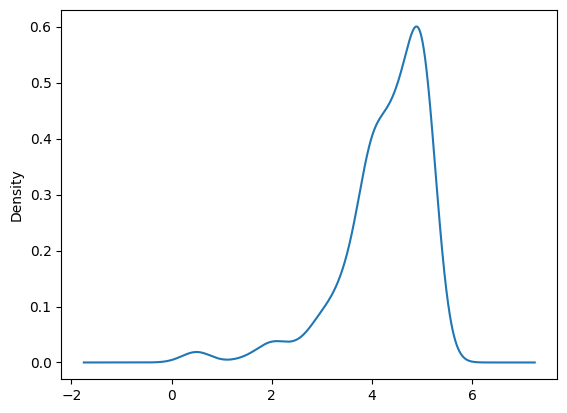

In [38]:
fight_club_ratings.plot(kind='kde')

In [ ]:
## Which movie is the most popular based on  average user ratings?


In [40]:
df_1_mer.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [54]:
             #Group user ratings based on movieId and apply aggregation operations
ratings_grouped = df_1_mer.groupby('movieId').agg({'rating': ['count', 'mean']})
ratings_grouped

rating          
         count      mean
movieId                 
1          215  3.920930
2          110  3.431818
3           52  3.259615
4            7  2.357143
5           49  3.071429
...        ...       ...
193581       1  4.000000
193583       1  3.500000
193585       1  3.500000
193587       1  3.500000
193609       1  4.000000

[9724 rows x 2 columns]

In [47]:
              #inner join on movies and grouped ratings dataframes
merged_data = pd.merge(df_movies, ratings_grouped, left_on='movieId', right_index=True, how='inner')

<ipython-input-47-18963bfb47a5>:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  merged_data = pd.merge(df_movies, ratings_grouped, left_on='movieId', right_index=True, how='inner')


In [50]:
        # more than 50 user ratings
filtered_data = merged_data[merged_data[('rating', 'count')] > 50]
filtered_data.head()

,movieId,title,genres,"(rating, count)","(rating, mean)"
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [60]:
                # movie with the highest average rating
most_popular_movie = filtered_data.loc[filtered_data[('rating', 'mean')].idxmax()]
most_popular_movie

movieId                                         318
title              Shawshank Redemption, The (1994)
genres                                  Crime|Drama
(rating, count)                                 317
(rating, mean)                             4.429022
Name: 277, dtype: object

In [ ]:
## Top 5 popular movies based on number of user ratings.

In [65]:
sorted_data = filtered_data.sort_values(by=('rating', 'count'), ascending=False)
sorted_data.head()


,movieId,title,genres,"(rating, count)","(rating, mean)"
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [ ]:
# Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [66]:
sci_fi_movies = merged_data[merged_data['genres'].str.contains('Sci-Fi')]
sci_fi_movies.head()


,movieId,title,genres,"(rating, count)","(rating, mean)"
23,24,Powder (1995),Drama|Sci-Fi,28,3.125000
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,38,4.013158
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051
59,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller,9,2.500000
68,76,Screamers (1995),Action|Sci-Fi|Thriller,15,3.400000


In [69]:
# Step 4: Sort Sci-Fi movies by rating count in descending order
sorted_sci_fi_movies = sci_fi_movies.sort_values(by=('rating', 'count'), ascending=False)
sorted_sci_fi_movies.head()

,movieId,title,genres,"(rating, count)","(rating, mean)"
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
898,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640


In [71]:
                #Get the third most popular Sci-Fi movie
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]
third_most_popular_sci_fi_movie

movieId                                         480
title                          Jurassic Park (1993)
genres             Action|Adventure|Sci-Fi|Thriller
(rating, count)                                 238
(rating, mean)                                 3.75
Name: 418, dtype: object

In [ ]:
# Mention the movieId of the movie which has the highest IMDB rating.

In [73]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [75]:
df_links=pd.read_csv("links.csv")
df_links.head()


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [77]:
df_3_merg=pd.merge(df_movies,df_links,on="movieId")
df_3_merg.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0


In [79]:
highest_imdb_movie = df_3_merg.loc[df_3_merg['imdbId'].idxmax()]
highest_imdb_movie

movieId                                 193587
title      Bungo Stray Dogs: Dead Apple (2018)
genres                        Action|Animation
imdbId                                 8391976
tmdbId                                483455.0
Name: 9740, dtype: object

In [ ]:
# Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.


In [80]:
sci_fi_movies = df_3_merg[df_3_merg['genres'].str.contains('Sci-Fi')]
sci_fi_movies.head()

,movieId,title,genres,imdbId,tmdbId
23,24,Powder (1995),Drama|Sci-Fi,114168,12665.0
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,112682,902.0
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,114746,63.0
59,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller,116839,11525.0
68,76,Screamers (1995),Action|Sci-Fi|Thriller,114367,9102.0


In [81]:
highest_imdb_sci_fi_movie = df_3_merg.loc[df_3_merg['imdbId'].idxmax()]
highest_imdb_sci_fi_movie

movieId                                 193587
title      Bungo Stray Dogs: Dead Apple (2018)
genres                        Action|Animation
imdbId                                 8391976
tmdbId                                483455.0
Name: 9740, dtype: object